In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')

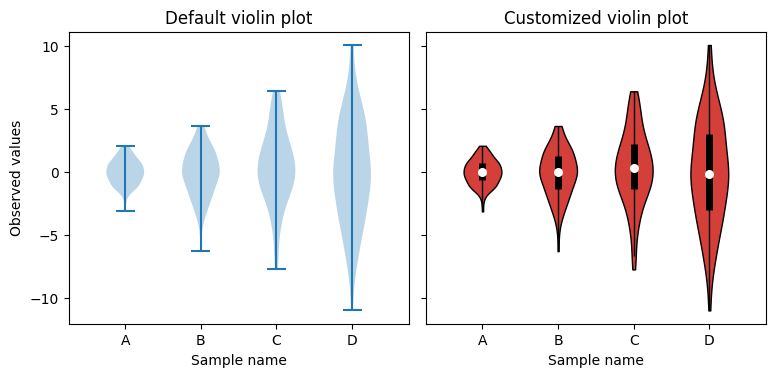

In [3]:
# create test data
np.random.seed(19680801)
data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)

ax1.set_title('Default violin plot')
ax1.set_ylabel('Observed values')
ax1.violinplot(data)

ax2.set_title('Customized violin plot')
parts = ax2.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax2.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax2.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# set style for the axes
labels = ['A', 'B', 'C', 'D']
for ax in [ax1, ax2]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

In [9]:
# Set display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # This will display all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to the next line
# reading CSV file into field descrptor
fd = pd.read_csv('Data/4G_Passive_measurements.csv')
print(fd.head(10))


   Unnamed: 0        Date          Time           UTC   Latitude  Longitude  Altitude  Speed  EARFCN  Frequency  PCI      MNC  CellIdentity  eNodeB.ID  Power   SINR   RSRP   RSRQ scenario  cellLongitude  cellLatitude  cellPosErrorLambda1  cellPosErrorLambda2  n_CellIdentities    distance  Band                 campaign
0      231098  14.01.2021  09:19:28.214  1.613291e+09  41.896722  12.507302     53.66   4.03    6300      806.0  412  "Op"[1]      76860425     300236 -54.38   6.70 -78.68 -19.41       OW      12.504280     41.890300            10.610001            10.610001                 6  757.483987    20  campaign_6_OW_4G_gaming
1      241306  14.01.2021  09:19:28.214  1.613291e+09  41.896722  12.507302     53.66   4.03    6300      806.0  411  "Op"[1]      76860427     300236 -52.63   5.18 -75.54 -16.26       OW      12.504280     41.890300            10.610001            10.610001                 6  757.483987    20  campaign_6_OW_4G_gaming
2      291097  14.01.2021  09:19:28.840 

In [10]:
print(list(fd.columns))

['Unnamed: 0', 'Date', 'Time', 'UTC', 'Latitude', 'Longitude', 'Altitude', 'Speed', 'EARFCN', 'Frequency', 'PCI', 'MNC', 'CellIdentity', 'eNodeB.ID', 'Power', 'SINR', 'RSRP', 'RSRQ', 'scenario', 'cellLongitude', 'cellLatitude', 'cellPosErrorLambda1', 'cellPosErrorLambda2', 'n_CellIdentities', 'distance', 'Band', 'campaign']
